## COMP 3400: Data Preparation Techniques Project
## Analysis of popular movies from 1980 to 2021

**Group Members:**
  - Liudmila Strelnikova 201819885
  - David Chicas 201919354
  
## Part One: Dataset Presentation

**Description of our data:**
This data set was uploaded by user *Daniel Grijalva* and was found in *Kaggle*, the dataset can be found [here](https://www.kaggle.com/datasets/danielgrijalvas/movies). This dataset compiles different aspect of the film industry from 1980 to 2020. In this data we can observe different patterns like the most commons release dates for films, the highest grossing genres of movies, as well as consumers best rated movies. We will use this information to analyze the trends in the movie industry.

**Description of our variables:**
- **Name:** Title of the film. This helps us differentiate between each film. 
- **Rating:** Given to each movie by the Classification and Ratings Administration (CARA), the rating provides information needed to determine of a film is suitable for children. We can use this information to see the difference between movies rated for everyone and for a specific group of consumers. 
- **Genre:** Is a thematic category given to a film depending on theme, plot, topics and other conventions. This information can help us determine what types of genres are the more popular, highest grossing, and more common. 
- **Year:** Release year of the film. Ranges from 1980 to 2020. We can use this to sed the difference between consuming movies in the past and present. 
- **Released:** Exact date when the film was released and place of release. This data can be presented in a more useful way by separating the information into two different columns. We can see what is the most commons and uncommon release date for a movie and see how it affects different aspects of the film. 
- **Score:** Rating given to a film by users of [iMDb.com](https://www.imdb.com) on a scale of 1 to 10 depending on enjoyability of the film. This can help us see any correlation between what consumers like and the different variables like genre, release date, and director.
- **Director:** Person who manages the film's creative aspects, like directing the film crew and actors. With the data we have we can see who the highest grossing directors are or the most well rated director. 
- **Writer:** Person who writed the script for the movie. This information is not relevant to our project.
- **Star:** Most known actor in that is in the movie. This information is not relevant to our project.
- **Country:** Place where the movie was released for it's premiere, decided by the producers and film company. We can see how the director or production company can affect the country of release for a film. 
- **Budget:** Amount of money alloted to the film's creation by the producers and film company, presented in US dollars. With this information we can see if a film was profitable or lost money, and we can also see if different directors/film company have any tendencies to having a bigger budget with certain variables. 
- **Gross:** Refers to gross box office earnings of a movie in U.S. dollars, this does not include any other forms of revenue. This can be used to see any impact that user score has, what genres are the most profitable, and many more correlations.
- **Company:** Business in charge of producing the film. We can see what type of film genre is most common with what film company, as well as the success that the companies films have. 
- **Runtime:** Total amount of time from start to finish that the film lasts. Presented in minutes. With this information we can see if the duration of the movie has any effect on budget, rating, or score. 

## Setup

First, we need to import all the necessary packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import string
import pandas as pd
import jinja2

pd.options.mode.chained_assignment = None #chained assignments are not flagged

Next, we need to import the datased from a .csv file and have a quick look at it.

In [3]:
movies = pd.read_csv('./movies.csv')
movies.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

## Getting rid of unnecessary columns, splitting "released" column

The columns "writer", "votes", and "star" do not present any significance in the analysis, so they are removed from the dataframe.

In [4]:
to_drop = ['writer', 'votes', 'star']
movies.drop(to_drop, inplace=True, axis=1)
movies.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score         director         country  \
0  June 13, 1980 (United States)    8.4  Stanley Kubrick  United Kingdom   
1   July 2, 1980 (United States)    5.8   Randal Kleiser   United States   
2  June 20, 1980 (United States)    8.7   Irvin Kershner   United States   
3   July 2, 1980 (United States)    7.7     Jim Abrahams   United States   
4  July 25, 1980 (United States)    7.3     Harold Ramis   United States   

       budget        gross             company  runtime  
0  19000000.0   46998772.0        Warner Bros.    146.0  
1   4500000.0   58853106.0   Columbia Pictures    104.0  
2  18000000.0  538375067.0           Lucasfilm    124.0  
3   3500000.0   83453539.0  Paramount Pictures     88.0  
4   6000000.0   39846344.0      Orion Pictures     98.0

The column "released" is split into "date" and "release_country" for more meaningful analysis. 

In [5]:
movies[['date','release_country']] = movies.released.str.split("(",expand=True)


By using the left parenthesis as a split symbol in the previous operation, the right parenthesis in the column release_country should be removed.

In [6]:
movies['release_country'] = movies['release_country'].str.replace(')', '', regex = True)

To finish this cleaning step off, the column "released" and "release_country" is deleted

In [7]:
movies.drop('released', inplace=True, axis=1)
movies.drop('release_country', inplace=True, axis=1)

## Attribute's Descriptors
## Part A: Qualitative attributes

### Date

From the distribution of movies released based on a month of the year, we can see that most moves are out in October, August, and March, with the least amount of movies being released in June. The data is distributed pretty evenly, without any obvious outliers.

In [8]:
#converting the values in the 'date' column to date format
movies["date"] = pd.to_datetime(movies["date"])
movies.head(2)

name rating      genre  year  score         director  \
0      The Shining      R      Drama  1980    8.4  Stanley Kubrick   
1  The Blue Lagoon      R  Adventure  1980    5.8   Randal Kleiser   

          country      budget       gross            company  runtime  \
0  United Kingdom  19000000.0  46998772.0       Warner Bros.    146.0   
1   United States   4500000.0  58853106.0  Columbia Pictures    104.0   

        date  
0 1980-06-13  
1 1980-07-02

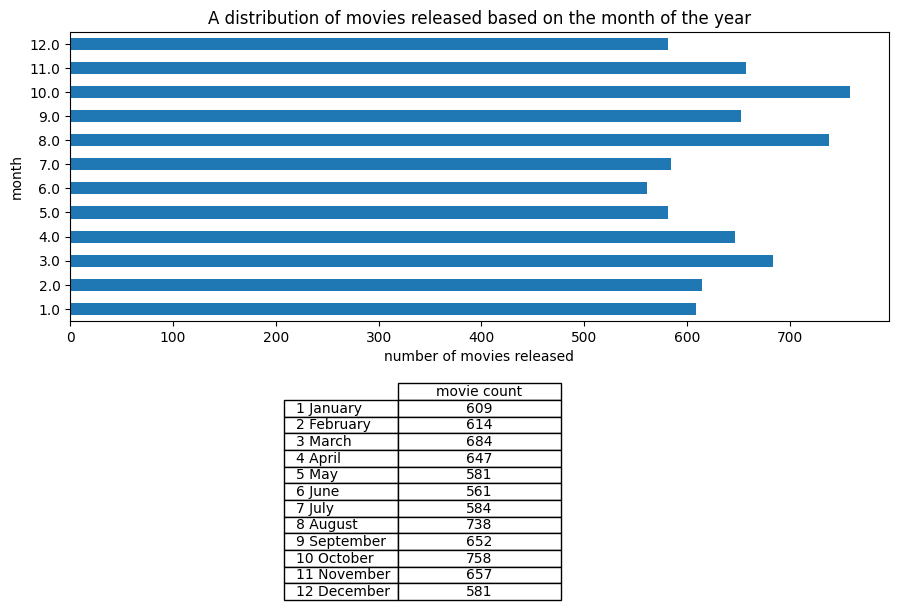

In [9]:
new_movies = movies.groupby(movies.date.dt.month).size()
new_movies = new_movies.to_frame(name="movie count")

fig, ax = plt.subplots(2,1,figsize=(10,7), gridspec_kw={'height_ratios': [2, 1]})
fig.tight_layout(pad = 5.0)

new_movies.plot.barh(ax=ax[0], legend = False)
ax[0].set(ylabel="month", xlabel="number of movies released")
ax[0].set_title("A distribution of movies released based on the month of the year")

ax[1].set_axis_off()
rows = ['1 January','2 February','3 March','4 April','5 May','6 June', '7 July', '8 August','9 September','10 October','11 November','12 December']
ax[1].table(cellText = new_movies.values.tolist(), rowLabels=rows, colLabels=['movie count'], loc='center',colWidths=[0.2,0.6], cellLoc='center')
plt.show()

### Rating

Rating is a classification given by the Motion Picture Association (MPA) to rate the target audience of a film. We can use this data later to see any correlation between film rating and gross earnings, scores, and other variables. 

From the rating data distribution, the overwhelming majority of movies are R-rated, with PG-13 taking the second place, followed by PG.

- R - to view this movie under 17 years of age, one would need an adult present. 
- PG-13 - some materials can be inappropriate for viewers under 13. Parental guidance recommended but not necessary.
- PG - parental guidance suggested, as the movie might not be appropriate for children of any age. 
- G - audiences of all ages are admitted. 
- Approved is the same as G.
- NC-17 - no one under 17 years of age is admitted. 
- TV-MA - a movie approved to be aired on TV but virtually has the rating of NC-17.
- TV-PG - a movie approved to be aired on TV but virtually has the rating of PG.
- TV-14 - a movie approved to be aired on TV but virtually has the rating of PG-14.
- X - pornographic content. 

**Things to change/consider based on the distribution:**
- Approved is the same as G, and should be changed during the cleaning stage. 
- The categories Unrated and not Rated can be combined into one. 

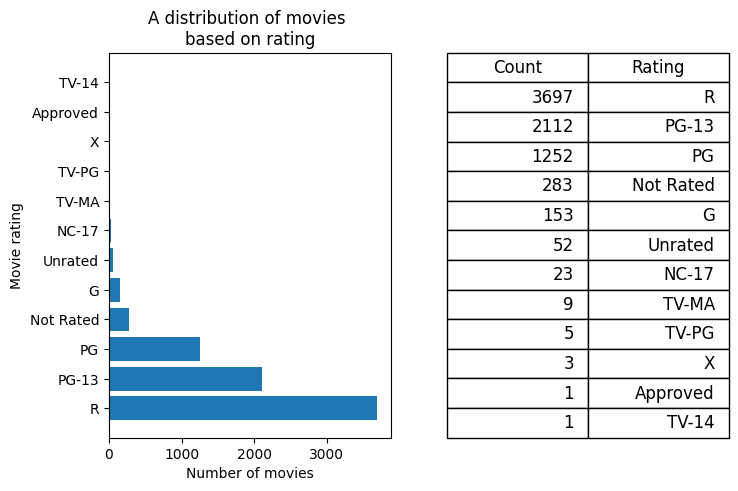

In [10]:
ratingsDF = pd.DataFrame()
ratingsDF['Count'] = movies['rating'].value_counts().sort_values(ascending=False)
ratingsDF['Rating'] = movies['rating'].value_counts().index.tolist()

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
plot = ax1.barh(ratingsDF['Rating'],ratingsDF['Count'], 0.8)
ax1.set(xlabel="Number of movies", ylabel = "Movie rating")
ax1.set_title("A distribution of movies \nbased on rating")

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size=12
bbox=[0, 0, 1, 1]
table = ax2.table(cellText = ratingsDF.values, bbox=bbox, colLabels=ratingsDF.columns)
table.auto_set_font_size(False)
table.set_fontsize(font_size)

plt.show()


### Genre

From the distribution of the genre attribute, we can see that most movies identify as a comedy, with Action and Drama being the second and third most popular labels. 

**Things to change/consider based on the distribution:**
- Most movies nowadays can fall under several genres, so I am not sure if it's impossible to draw any sort of meaningful conclusion from the genre distribution alone.


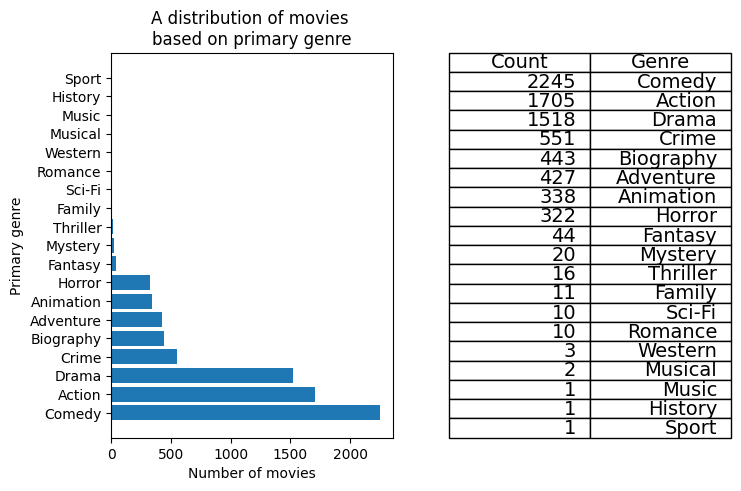

In [11]:
GenreDF = pd.DataFrame()
GenreDF['Count'] = movies['genre'].value_counts()
GenreDF['Genre'] = movies['genre'].value_counts().index.tolist()

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
plot = ax1.barh(GenreDF['Genre'],GenreDF['Count'], 0.8)
ax1.set(xlabel="Number of movies", ylabel = "Primary genre")
ax1.set_title("A distribution of movies \nbased on primary genre")

ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = GenreDF.values, bbox=bbox, colLabels=GenreDF.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

### Year

The distribution shows that the dataset contains 200 most popular movies for each year from 1997 to 2020.

**Things to change/consider based on the distribution:**
- We should definetely not consider the movies from 2020 as the author of the dataset stopped acquiring them before the end of the year.  
- Not a lot of popular movies were made in the years between 1980 t0 1984. Nonetheless, the period consists of a lot of "classics", so it might be reasonable to still use this data keeping in mind that there are less movies.

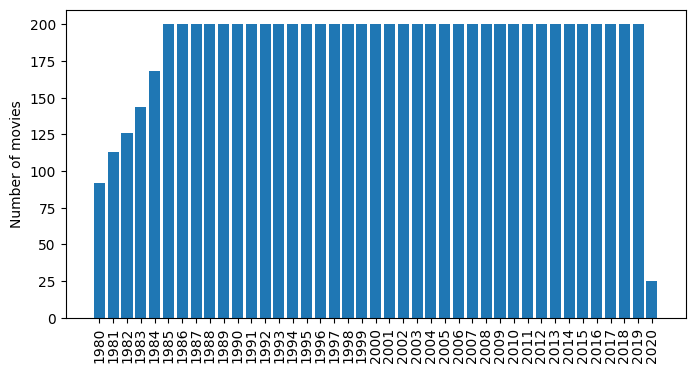

In [12]:
YearsDF = pd.DataFrame()
YearsDF['Count'] = movies['year'].value_counts().sort_values(ascending=False)
YearsDF['Year'] = movies['year'].value_counts().index.tolist()

YearsDF.sort_values(by = 'Year') #want to make sure no year is skipped

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(YearsDF['Year'],YearsDF['Count'], 0.8)
ax.set_xticks(YearsDF['Year'], labels=YearsDF['Year'],rotation=90)
ax.set(ylabel = "Number of movies")

plt.show()

### Score

Score attribute has a normal distribution, with most movies being awarded a score of around 6.5.

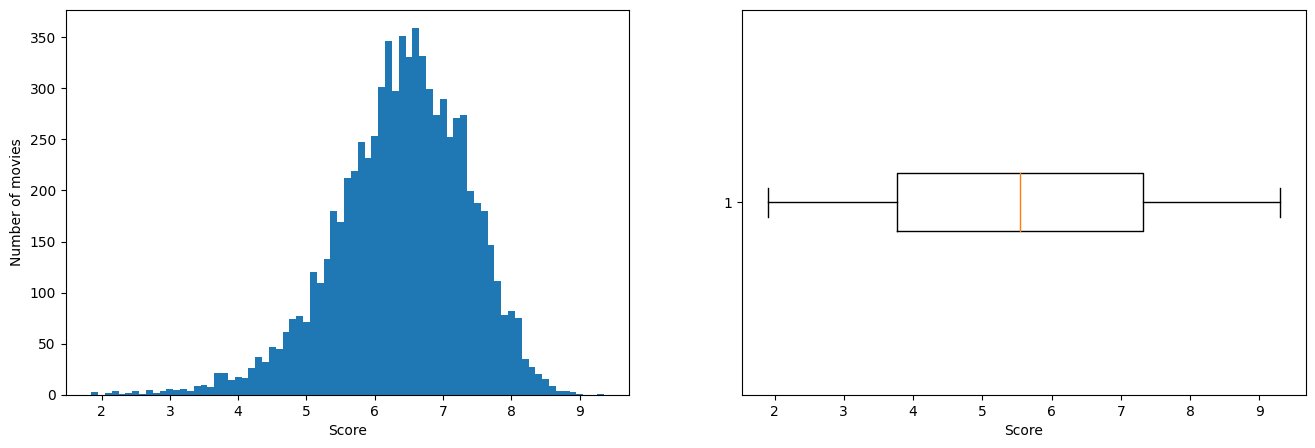

In [13]:
ScoreDF = pd.DataFrame()
ScoreDF['Count'] = movies['score'].value_counts().sort_values(ascending=False)
ScoreDF['Score'] = movies['score'].value_counts().index.tolist()

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
plot = ax1.bar(ScoreDF['Score'],ScoreDF['Count'],0.1)
ax1.set(xlabel = "Score", ylabel = "Number of movies")

ax2=fig.add_subplot(122)
bar = ax2.boxplot(ScoreDF['Score'],vert = False)
ax2.set(xlabel = "Score")

plt.show()

### Director

The average amount of movies made by one director is three. The maximum amount of movies on the list was made by Woody Allen, with a whooping thirty eight projects! 

It is worth mentioning that 28 movies on the list seem to be made by the ambiguous "Directors" organization. Despite being considered as the same entity in the distribution, "Directors" refers to projects made by several people, with no main director. For example, Twilight Zone - a movie produced in 1983 - consists of four parts, each directed by four different people. Keeping that in mind, the 'director' attribute faces the same dilemma as the 'genre' attribute where most movies would have several directors working on a film, but only the arbitrary 'main' one is selected for analysis. 

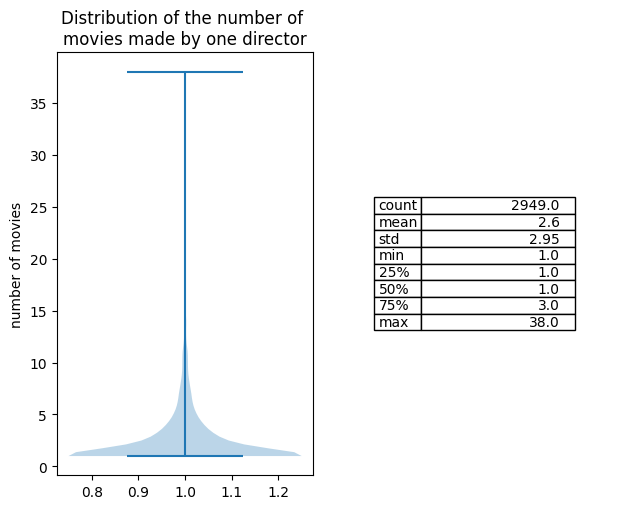

In [14]:
DirectorDF = pd.DataFrame()
DirectorDF['Count'] = movies['director'].value_counts().sort_values(ascending = False)

fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=1)

ax[0].violinplot(DirectorDF['Count'])
ax[0].set_title("Distribution of the number of \nmovies made by one director")
ax[0].set(ylabel="number of movies")

ax[1].set_axis_off()
rows = ['count', 'mean', 'std', 'min','25%','50%','75%','max']
ax[1].table(cellText = round(DirectorDF.describe(),2).values.tolist(), rowLabels=rows, loc='center', colWidths=[0.6,0.2])

plt.show()

### Company

The company attribute distribution looks even more uneven than the previously analyzed director's. Among over 2,300 companies, the average amount of movies made is three, with a few movie giants dominating the market such as Universal Pictures (377 movies), Warner Bros. (344), etc. 


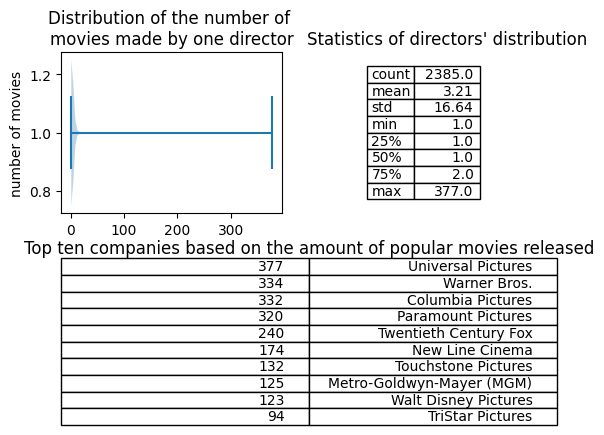

In [15]:
CompanyDF = pd.DataFrame()
CompanyDF['Count'] = movies['company'].value_counts().sort_values(ascending = False)
CompanyDF['Company'] = movies['company'].value_counts().index.tolist()

fig = plt.figure()
plt.subplots_adjust(wspace= 0.25, hspace= 0.30)

ax0 = fig.add_subplot(2,2,1)
ax0.violinplot(CompanyDF['Count'],vert=False)
ax0.set_title("Distribution of the number of \nmovies made by one director")
ax0.set(ylabel="number of movies")

ax1 = fig.add_subplot(2,2,2)
ax1.set_axis_off()
rows = ['count', 'mean', 'std', 'min','25%','50%','75%','max']
ax1.table(cellText = round(CompanyDF.describe(),2).values.tolist(), rowLabels=rows, loc='center', colWidths=[0.3,0,3])
ax1.set_title("Statistics of directors' distribution")

ax2 = fig.add_subplot(2,2,(3,4))
ax2.set_axis_off()
ax2.table(cellText = CompanyDF.iloc[:10].values.tolist(), loc = 'center')
ax2.set_title("Top ten companies based on the amount of popular movies released")

plt.show()

### Country

To analyze the 'country' attribute in the dataset,several map plots were made.The color on the map indicates the total amount of movies produced in a country, with green being a relatively high amount and red being a low number of movies. All the plots presented are snapshops from a [dashboard](https://public.tableau.com/shared/34R9DN2ZY?:display_count=n&:origin=viz_share_link) in Tableau. 

Below is the map plot for ten countries that have the most amount of movies over the period from 1980 to 2021. 

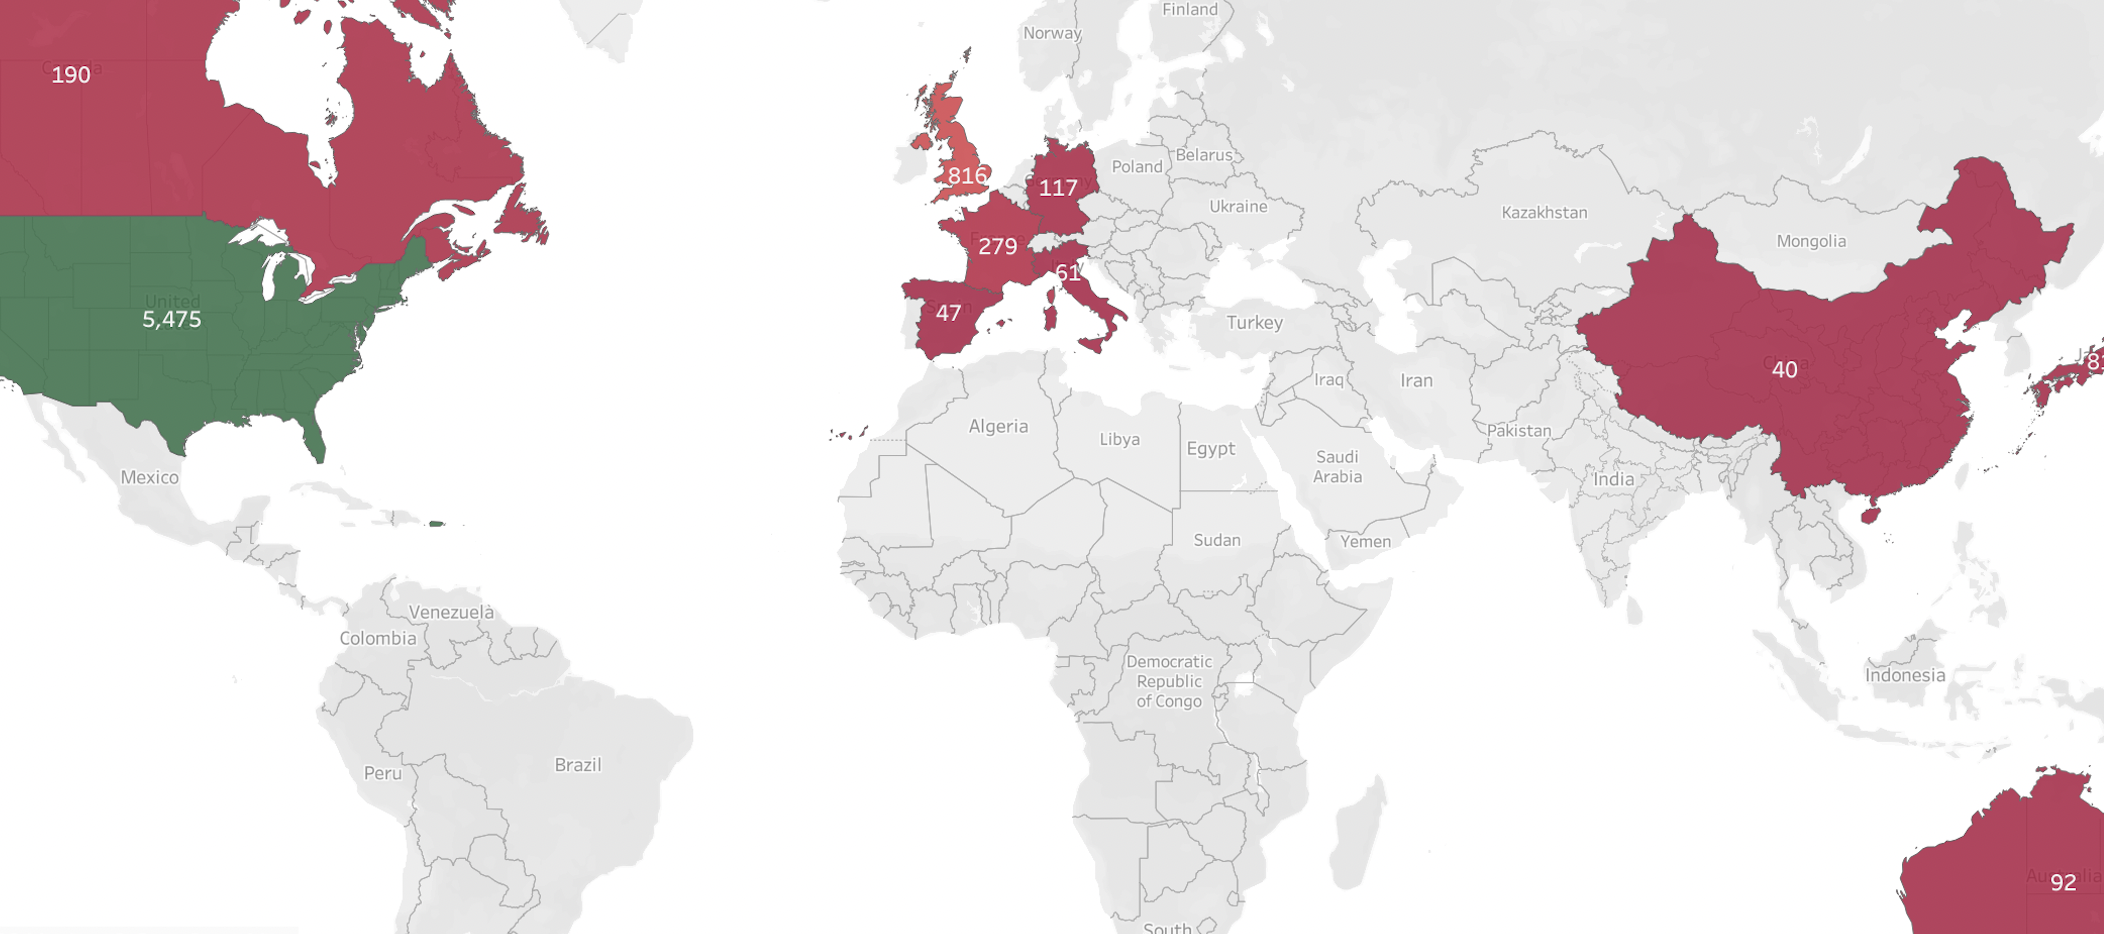

Since the US have produced over 70% of the movies, the other top nine movies are colored the same dense red color. If the US is omitted, we get the graph below which gives a better understanding of the top ten amount of movies' distribution.

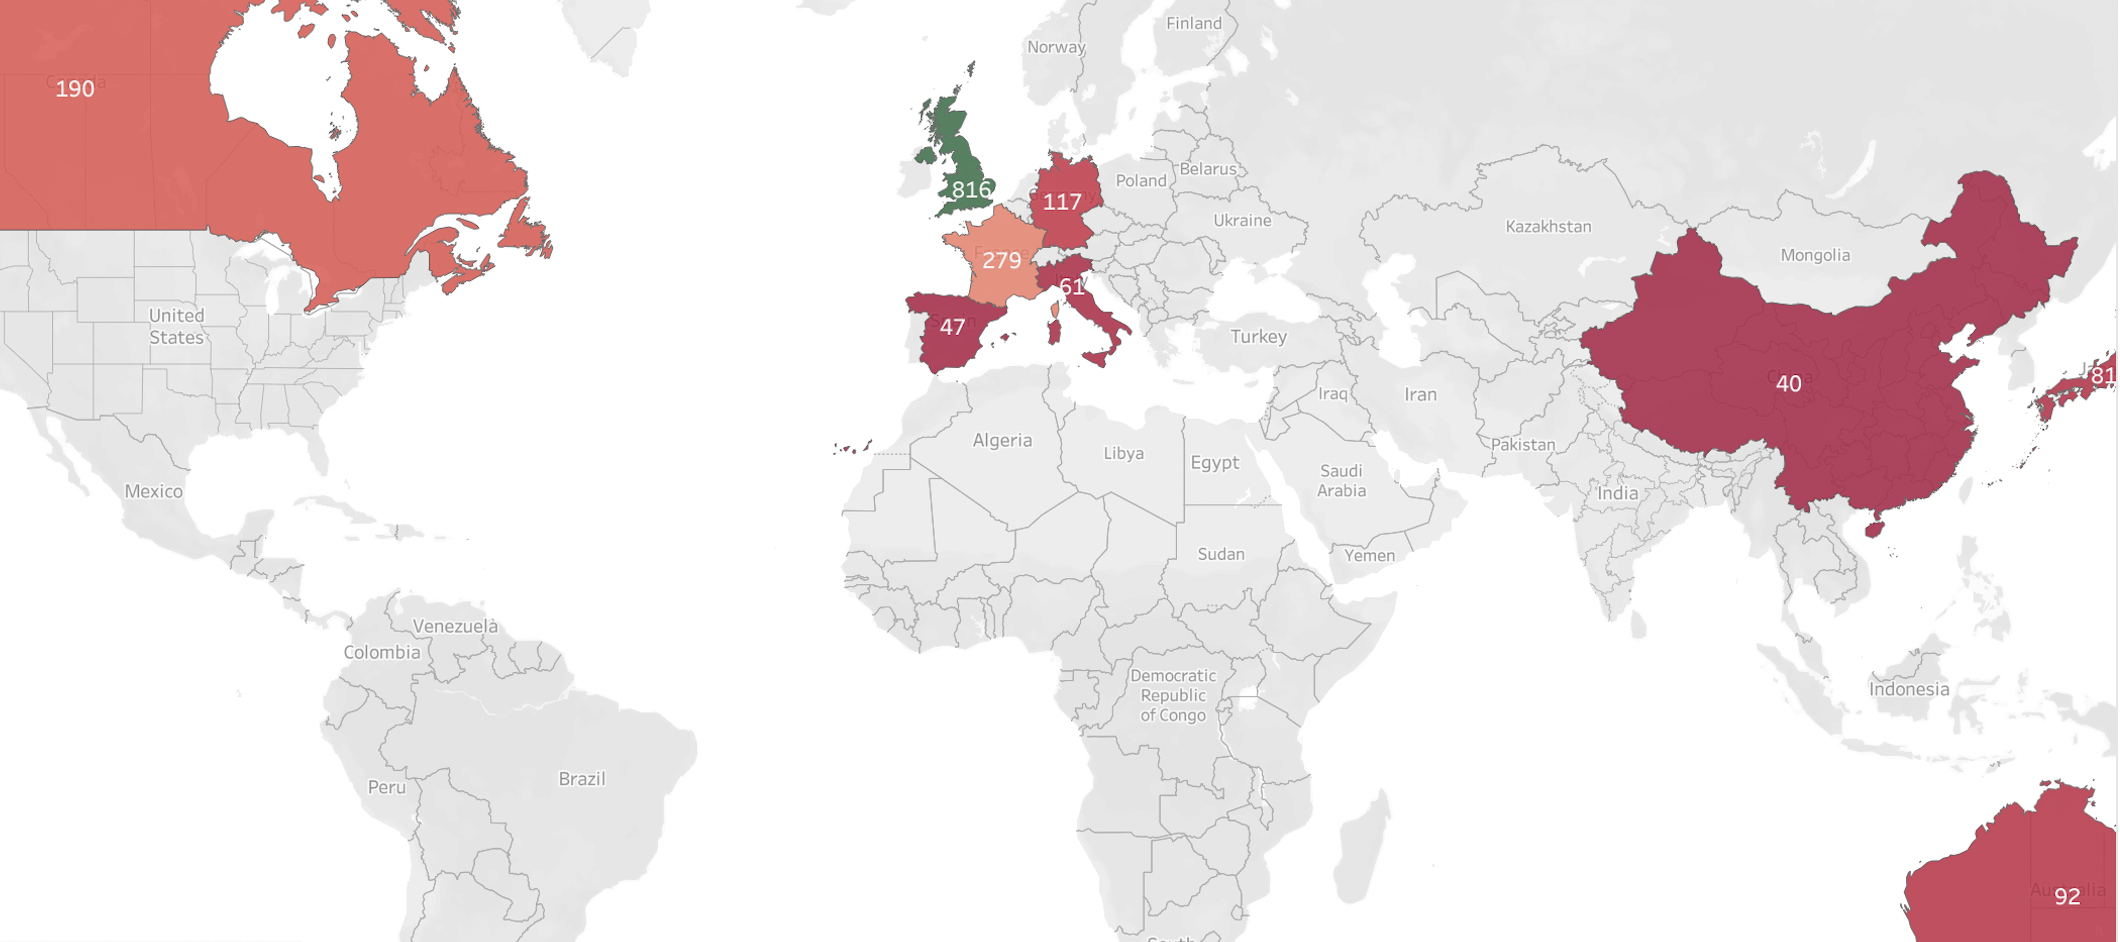

Finally, there is a map plot that includes all countires in the dataset, still excluding the US for clairity. 

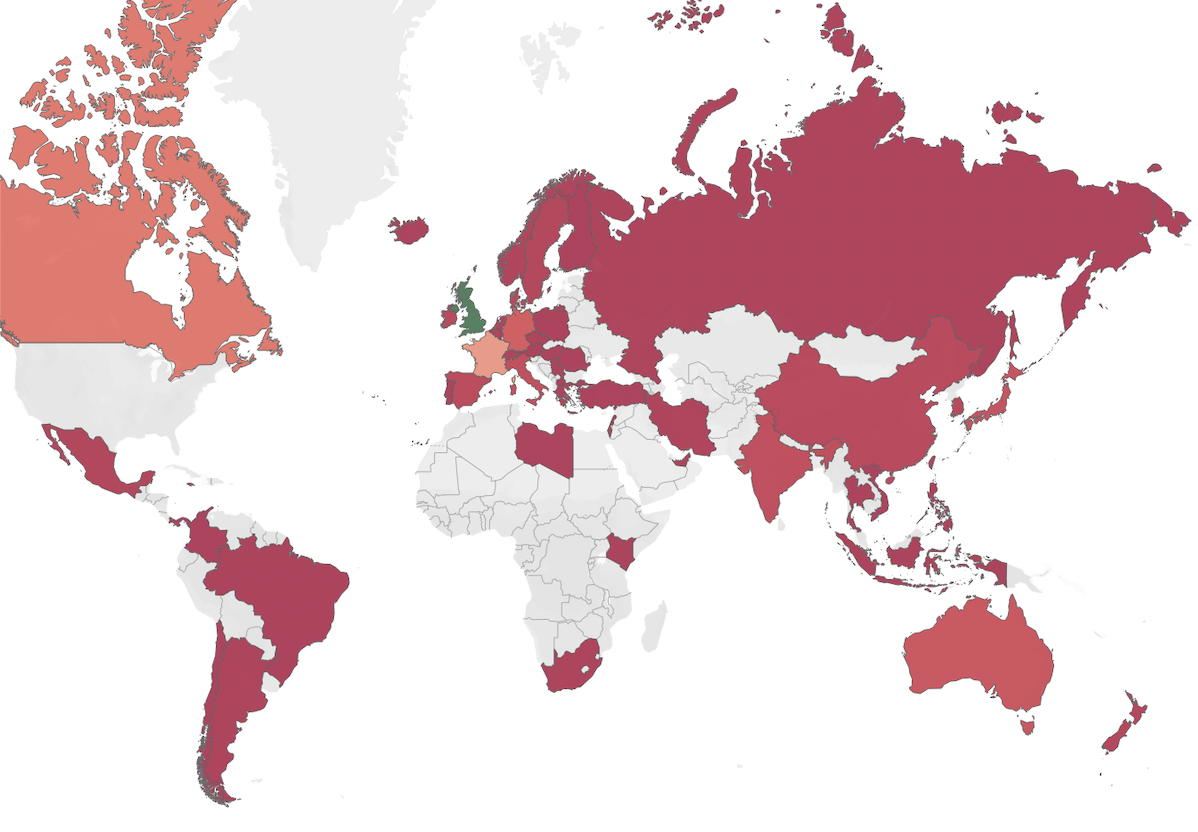

### Name

The analysis of movie names was performed in Voyant tools to produce an [infographic](https://voyant-tools.org/?corpus=cc85aec5683522b8e56b8410dc9f007c&panels=cirrus,reader,trends,summary,contexts) that included the visual shown below which captures the most commonly used words (or parts of words) used in the movie titles.

Top 5 most frequent words (parts of a word) are 'man' (129), 'love' (92), 'II' (75), 'night' (66), and  'dead' (58).

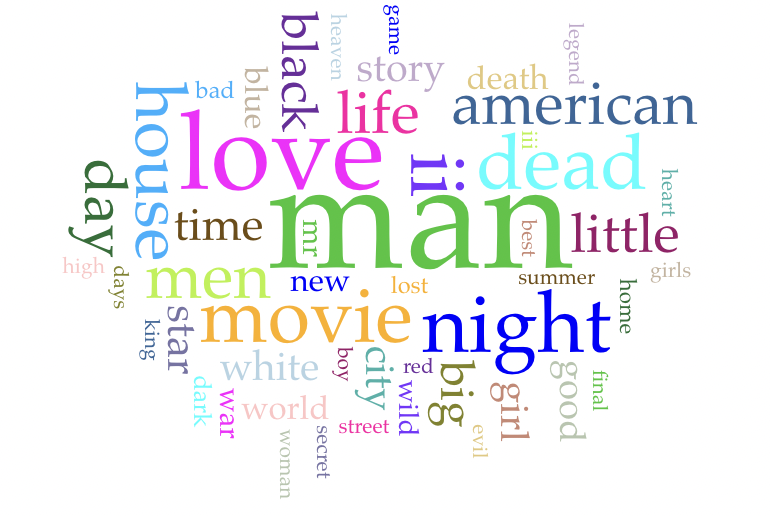

## Part B: Quantitative attributes

In [16]:
#The function takes the variables data, var_name and label and returns a box plot, a violin plot
# and a table with descriptive statistics to illustrate data distribution

#@data (Series) - the data to run analysis on 
#@var_name (str) - the name of the attribute
#@ylabel (str) - typically the name of the attribute and the units

def num_plot(data, var_name, ylabel):
    df = pd.DataFrame(data = data.dropna())
    fig, ax = plt.subplots(1,3,figsize=(8,4))
    fig.tight_layout()
    
    ax[0].boxplot(df,1,'rs')
    ax[0].set_title("Box plot showing distribution \nof " + var_name)
    ax[0].set(ylabel=ylabel)
    
    ax[1].violinplot(df)
    ax[1].set_title("Violin plot showing distribution \nof " + var_name)
    
    ax[2].set_axis_off()
    rows = ['count', 'mean', 'std', 'min','25%','50%','75%','max']
    ax[2].table(cellText = df.describe().values.tolist(), rowLabels=rows, colLabels=[var_name + " statistics"], loc='center')
    

### Runtime

From the runtime distribution, we can see that 50% of movies run around 100 minutes, with an average screening time being approximately 107 minutes. The minimum duration of a movie is 55 minutes, and the maximum is 366 minutes, both of which are acceptable movie durations indicating that there are not any obvious outliers in the distribution.


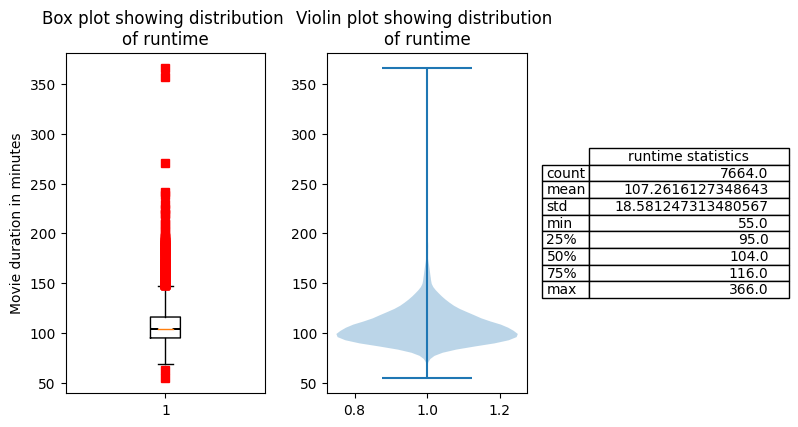

In [17]:
data_runtime = movies['runtime']
title_runtime = 'runtime'
ylabel_runtime = "Movie duration in minutes"

num_plot(data_runtime, title_runtime, ylabel_runtime)

### Budget

It is clearly seen that 50% of all movies in the dataset have a budget of around 40,000,000 USD, with the minimum budget being 5,497 USD, and maximum - 356,000,000 USD. 

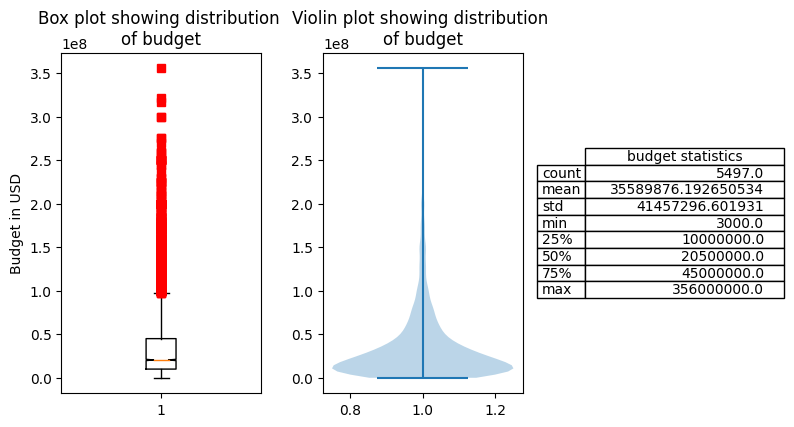

In [18]:
data = movies['budget']
title = 'budget'
ylabel = "Budget in USD"

num_plot(data, title, ylabel)

### Gross

From the distribution, we can see that 50% of all movies in the dataset have made around 80,000,000 USD, with the minimum earnings being only 309 USD, and maximum - 2,847,246,203 USD.

There are no movies in the dataset that made "negative amount of money" meaning we don't have to clean those outliers. It seems like there are a lot of "outliers" beyond the right interquartile range but that is mostly due to how massive the dataset is, and not the fault of the data. 

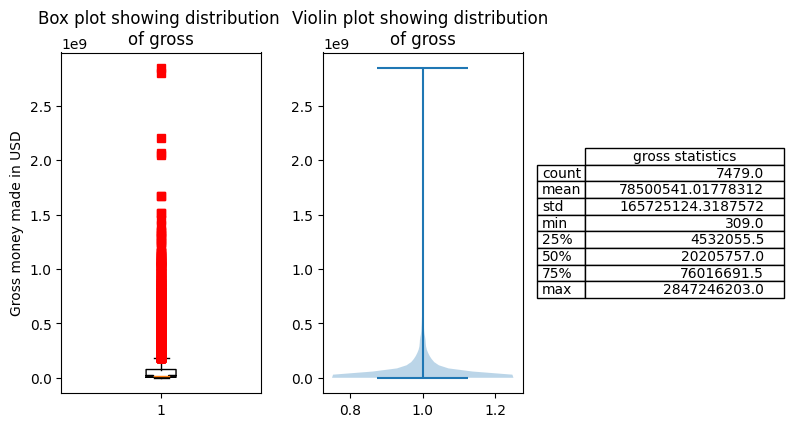

In [19]:
data_gross = movies['gross']
title_gross = 'gross'
ylabel_gross = "Gross money made in USD"

num_plot(data_gross, title_gross, ylabel_gross)

## Data insights

**How budgeting and earnings of movies changed over the years**

There is always a lot of analysis that can be done with finances. Therefore, we have chosen to have a closer look at budgeting and earnings for the movies as our first data insight.

Having plotted a line graph that illustrates how budgeting and earnings of movies changed over the years, we can notice that movies' gross earnings have been steadily increasing over the years. Movies have also been becoming more expensive to make, however the increase in this parameter is not as drastic. 

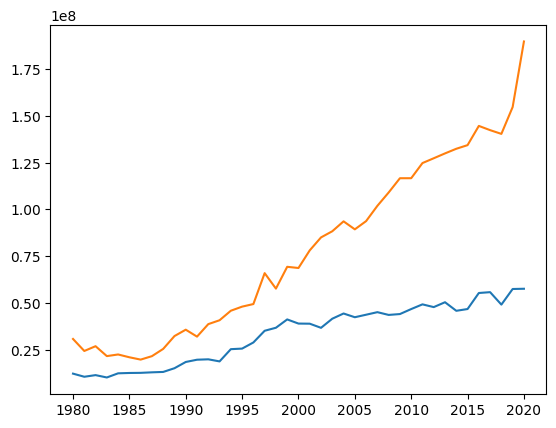

In [20]:
agg_dict = {'budget': ['mean'], 'gross': ['mean']}
shmoney = movies.groupby(['year']).agg(agg_dict)

fig,ax = plt.subplots()
ax.plot(shmoney)
plt.show()

**Correlation between score and budget**

Another insight that can be gained from the dataset is the clear correlation between the movie score and movie budget. As the budget increases, genereally the score increases as well.

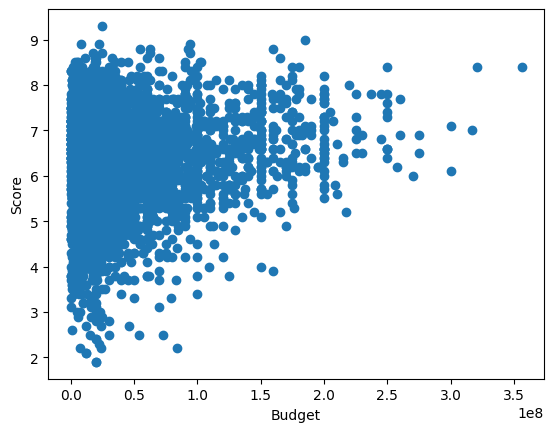

In [21]:
plt.scatter(movies[['budget']], movies[['score']])
plt.xlabel("Budget")
plt.ylabel("Score")
plt.show()

**Correlation between budget and gross**

Typycally, as Budget of the movies goes up, so do the Gross company earnings. 

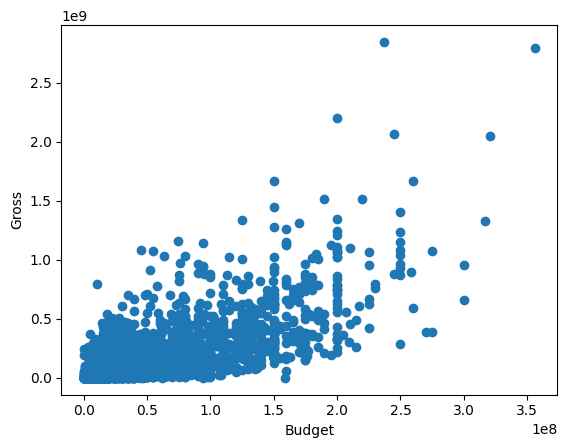

In [22]:
plt.scatter(movies[['budget']], movies[['gross']])
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

## Part Two: Data Cleaning  - Data cleanup based on attribute discriptors

### Rating
The first issue was noticed with **rating** attribute, in which Unrated should be replaced with Not Rated, and Approved with G for consistency.

In [24]:
print("Number of 'Unrated' movies:", (movies['rating'].values == 'Unrated').sum()) #one way to print the count of values
print("Number of 'Approved movies:", (movies['rating'].values == 'Approved').sum())

Number of 'Unrated' movies: 52
Number of 'Approved movies: 1


In [25]:
#Before cleaning, there are 283 movies with rating 'Not Rated', and 52 movies with the count 'Unrated'
movies['rating'] = movies['rating'].replace(['Unrated'], 'Not Rated')
#There is also one Approved film before cleaning
movies['rating'] = movies['rating'].replace(['Approved'],'G')

In [26]:
#After the cleaning, there are 335 movies with 'Not Rated' rating
print("Number of 'Unrated' movies after cleanup:", (movies['rating'].values == 'Unrated').sum()) #one way to print the count of values
print("Number of 'Approved movies after cleanup:", (movies['rating'].values == 'Approved').sum())

Number of 'Unrated' movies after cleanup: 0
Number of 'Approved movies after cleanup: 0


### Year

For the **year** attribute, we need to drop all the films from 2020, as its set is incomplete. 

In [ ]:
print("Number of movies from 2020:", len(movies[movies['year'] == 2020]) #another way to print the count of values

In [ ]:
movies.drop(movies.index[(movies['year'] == 2020)],axis=0,inplace=True)

In [ ]:
len(movies[movies['year'] == 2020])

## Part Two: Data Cleaning

To simulate some data cleanup procedure we will make a copy of our dataset and add some missing data and outliers to the copy so we can later clean it up and show some data cleanup procedures. 

First we will delete some random data (between 10% and 20%):

In [24]:

moviesCopy = movies.copy(deep=True)
# To accurately delete between 10% and 20% of the data we need the total amount of values in our data set
total = (len(moviesCopy.columns) * len(moviesCopy['name'].values))
rdPercent = np.random.randint(10,20)
perDel = total * (rdPercent/100)

for i in range(round(perDel)):

    # Randomly choose a column
    randColumn = np.random.choice(moviesCopy.columns)

    # Randomly choose a value from that column
    randData = moviesCopy[randColumn].values
    rdLen = len(randData)
    rdNum = np.random.randint(0,rdLen)
    moviesCopy[randColumn][rdNum] = ''

In [25]:
moviesCopy.head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                                      R             1980   
2  Star Wars: Episode V - The Empire Strikes Back            Action  1980   
3                                       Airplane!     PG             1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R                    
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders                    1980   

  score            director         country      budget        gross  \
0   8.4     Stanley Kubrick  United Kingdom  19000000.0                
1   5.8      Randal Kleiser   United States   4500000.0   58853106.0   
2   8.7      Irvin Kershner   United States  18000000.0  538375067.0   
3   7.7                       United States   3500000.0   83453539.0   
4   7.3        Harold Ramis   United States   6000000.0   39846344.0   
5   6.4  Sean S. Cunningham   United States               39754601.0   
6   7.9         John Landis   United States  27000000.0                
7   8.2     Martin Scorsese   United States  18000000.0   23402427.0   
8   6.8      Richard Lester   United States  54000000.0  108185706.0   
9   7.0         Walter Hill   United States  10000000.0   15795189.0   

                        company runtime       date  
0                  Warner Bros.   146.0 1980-06-13  
1             Columbia Pictures   104.0 1980-07-02  
2                     Lucasfilm   124.0 1980-06-20  
3            Paramount Pictures         1980-07-02  
4                Orion Pictures    98.0 1980-07-25  
5            Paramount Pictures    95.0 1980-05-09  
6            Universal Pictures   133.0 1980-06-20  
7  Chartoff-Winkler Productions   129.0 1980-12-19  
8                                 127.0 1981-06-19  
9                United Artists         1980-05-16

Now we will add some outliers to our data

In [26]:
# To accurately add between 3% and 5% of outliers to the data we need the total amount of values in our data set
total = (len(moviesCopy.columns) * len(moviesCopy['name'].values))
rdPercent = np.random.randint(3,5)
perDel = total * (rdPercent/100)
print("Number of outliers to add:", round(perDel))

for i in range(round(perDel)):

    # Randomly choose a column
    randColumn = np.random.choice(moviesCopy.columns)

    # Randomly choose a value from that column
    randData = moviesCopy[randColumn].values
    rdLen = len(randData)
    rdNum = np.random.randint(0,rdLen)
    
    if type(moviesCopy[randColumn][rdNum]) is str:
        moviesCopy[randColumn][rdNum] = 'string outlier'
        
    elif type(moviesCopy[randColumn][rdNum]) is int:
        #subset = moviesCopy.IndexSlice(randColumn,rdNum)
        if moviesCopy[randColumn][rdNum] > 1050:
            moviesCopy[randColumn][rdNum] *= 5 

    elif type(moviesCopy[randColumn][rdNum]) is float:
        if moviesCopy[randColumn][rdNum] > 10000:
            moviesCopy[randColumn][rdNum] *= 0.1000



Number of outliers to add: 3681


In [27]:
moviesCopy.head(10)

name rating           genre  \
0                                     The Shining      R           Drama   
1                                  string outlier      R                   
2  Star Wars: Episode V - The Empire Strikes Back                 Action   
3                                       Airplane!     PG                   
4                                      Caddyshack      R          Comedy   
5                                 Friday the 13th      R          Horror   
6                              The Blues Brothers      R                   
7                                     Raging Bull      R  string outlier   
8                                     Superman II     PG          Action   
9                                 The Long Riders                          

   year score            director         country      budget        gross  \
0  1980   8.4     Stanley Kubrick  United Kingdom  19000000.0                
1  9900   5.8      Randal Kleiser   United States   4500000.0   58853106.0   
2  1980   8.7      Irvin Kershner   United States   1800000.0  538375067.0   
3  1980   7.7                       United States   3500000.0   83453539.0   
4  1980   7.3        Harold Ramis   United States   6000000.0   39846344.0   
5  1980   6.4  Sean S. Cunningham   United States               39754601.0   
6         7.9         John Landis   United States  27000000.0                
7  1980   8.2     Martin Scorsese   United States  18000000.0   23402427.0   
8  1980   6.8      Richard Lester   United States  54000000.0  108185706.0   
9  1980   7.0         Walter Hill   United States  10000000.0   15795189.0   

                        company runtime       date  
0                  Warner Bros.   146.0 1980-06-13  
1             Columbia Pictures   104.0 1980-07-02  
2                     Lucasfilm   124.0 1980-06-20  
3            Paramount Pictures         1980-07-02  
4                Orion Pictures    98.0 1980-07-25  
5            Paramount Pictures    95.0 1980-05-09  
6            Universal Pictures   133.0 1980-06-20  
7  Chartoff-Winkler Productions   129.0 1980-12-19  
8                                 127.0 1981-06-19  
9                string outlier         1980-05-16